#NN-back-popaghation

# 1 Neural Networks

## 1.1 Visualizing the data

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat('data/ex4data1.mat')

Visualizing the data:

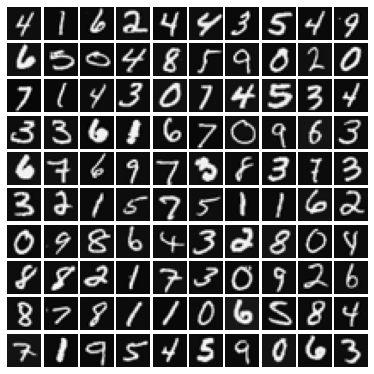

In [2]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
indexes = np.random.choice(5000, rows*cols)
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(mat['X'][indexes[count]].reshape((20,20), order='F'), cmap='gray')
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

## 1.2 Model representation

In [3]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [4]:
mat_weights = scipy.io.loadmat('data/ex4weights.mat')
mat_weights['Theta1'].shape, mat_weights['Theta2'].shape

((25, 401), (10, 26))

Unroll parameters:

In [5]:
nn_params = np.hstack((mat_weights['Theta1'].ravel(order='F'), 
                       mat_weights['Theta2'].ravel(order='F')))

In [6]:
nn_params = np.hstack((mat_weights['Theta1'].ravel(order='F'), 
                       mat_weights['Theta2'].ravel(order='F')))

In [7]:
nn_params

array([-0.02256239, -0.09838113,  0.11615605, ..., -2.11014003,
       -2.1319153 , -1.32752042])

## 1.3 Feedforward and cost function

In [8]:
import numpy as np
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

In [9]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T))
        J = J + (j/m)
    return J

In [10]:
J = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'])
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.287629)'.format(J))

Cost at parameters (loaded from ex4weights): [0.28762917] 
(this value should be about 0.287629)


## 1.4 Regularized cost function

In [11]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    return J

In [12]:
lambda_r = 1

J = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.383770)'.format(J))

Cost at parameters (loaded from ex4weights): [0.38376986] 
(this value should be about 0.383770)


# 2. Backpropagation

In [13]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1-sigmoid(z))

## 2.2 Random initialization

In [14]:
epsilon_init = 0.12
initial_theta1 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(hidden_layer_size, input_layer_size+1))
initial_theta2 = np.random.uniform(low=-epsilon_init, high=epsilon_init, size=(num_labels, hidden_layer_size+1))

## 2.3 Backpropagation

In [16]:
def nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    
    theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
    theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')
    
    m = X.shape[0]
    J = 0
    
    K = num_labels
    X = np.hstack((np.ones((m,1)),X)) #add bias unit

    capital_delta1 = np.zeros(theta1.shape)
    capital_delta2 = np.zeros(theta2.shape)
    
    for i in range(m):
        a1 = X[i]
        
        z2 = a1.dot(theta1.T)
        a2 = sigmoid(z2)
        a2 = np.hstack([1, a2]) ##add bias unit
        
        z3 = a2.dot(theta2.T)
        a3 = sigmoid(z3)
        
        h = a3
        
        yk = np.zeros((K,1)) ##y is as K-dimensional vector
        yk[y[i,0]-1, 0] = 1
        
        j = (-yk.T.dot(np.log(h).T) - (1-yk).T.dot(np.log(1-h).T)) ##sum of K
        J = J + (j/m) #sum of i
        
        delta3 = a3 - yk.T
        
        z2 = np.hstack([1, z2])
        delta2 = theta2.T.dot(delta3.T) * (sigmoid_gradient(z2).reshape(-1,1))
        
        capital_delta1 = capital_delta1 + (delta2[1:,:].dot(a1.reshape(1,-1)))
        capital_delta2 = capital_delta2 + (delta3.T.dot(a2.reshape(1,-1)))
        
    sum1 = np.sum(np.sum(theta1[:, 1:] ** 2))
    sum2 = np.sum(np.sum(theta2[:, 1:] ** 2))
    J = J + (lambda_r / (2*m)) * (sum1 + sum2)
    
    theta1_grad = (1/m) * (capital_delta1 + lambda_r * theta1) #with regularization
    theta1_grad[:,0] = ((1/m) * capital_delta1)[:,0]
    
    theta2_grad = (1/m) * (capital_delta2 + lambda_r * theta2) #with regularization
    theta2_grad[:,0] = ((1/m) * capital_delta2)[:,0]
    
    grad = np.hstack((theta1_grad.ravel(order='F'), theta2_grad.ravel(order='F')))
    return J, grad

## 2.4 Gradient Checking

In [17]:
def compute_numerical_gradient(theta, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r):
    e = 0.0001
    num_grad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    for p in range(len(theta)):
        perturb[p] = e
        loss1, _ = nn_cost_function(theta-perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        loss2, _ = nn_cost_function(theta+perturb, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
        num_grad[p] = (loss2-loss1)/(2*e)
        perturb[p] = 0
    return num_grad

In [18]:
def debug_initialize_weights(fan_out, fan_in):
    W = np.zeros((fan_out, 1+fan_in))
    W = np.reshape(range(len(W.ravel(order='F'))), W.shape)/10
    return W

In [19]:
def check_nn_gradients(lambda_r=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    theta1 = debug_initialize_weights(hidden_layer_size, input_layer_size)
    theta2 = debug_initialize_weights(num_labels, hidden_layer_size)
    
    X = debug_initialize_weights(m, input_layer_size-1)
    y = 1 + np.mod(range(m), num_labels).reshape(-1, 1)
    
    nn_params = np.hstack((theta1.ravel(order='F'), theta2.ravel(order='F')))
    
    cost, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    num_grad = compute_numerical_gradient(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_r)
    
    print('The columns should be very similar...')
    for i, j in zip(num_grad, grad):
        print(i,j)
        
    diff = np.linalg.norm(num_grad-grad)/np.linalg.norm(num_grad+grad)
    if diff < 0.000000010:
        print('\nBackpropagation is correct')
    else:
        print('\nBackpropagation is incorrect')

In [20]:
check_nn_gradients()

The columns should be very similar...
0.3508102791105472 0.35081027824835614
0.2353522188158763 0.2353522188291445
0.1452979107607888 0.14529791114175525
0.09315199914539107 0.09315199923194291
0.06032069570061083 0.06032069599693199
0.1937398015439129 0.19373980185067552
0.08735383096869498 0.08735383078360325
0.029773973508895324 0.029773974437035562
0.010590364460938417 0.010590364574492521
0.004047666530837546 0.00404766588020231
0.2288208313494522 0.22882082967551112
0.11088905266909421 0.11088905266651768
0.044303765989184285 0.04430376555121108
0.019905564396793807 0.01990556449768681
0.010079735703882875 0.010079735479895512
0.26390185717595216 0.2639018575003467
0.1344242739431678 0.13442427454943215
0.058833556648707486 0.0588335566653866
0.029220764217186 0.029220764420881108
0.01611180537430812 0.01611180507958871
0.39622224609736634 0.3962222462654107
0.5887339968513317 0.588733996850061
0.7994663673738245 0.7994663670394307
0.24984228291557997 0.2498422829571028
0.3490656

In [21]:
lambda_r = 3
check_nn_gradients(lambda_r)
J, grad = nn_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, mat['X'], mat['y'], lambda_r)
print('Cost at parameters (loaded from ex4weights): {0} \n(this value should be about 0.576051)'.format(J))

The columns should be very similar...
0.35081027911942897 0.35081027824835614
0.2353522188158763 0.2353522188291445
0.145297910751907 0.14529791114175525
0.09315199914539107 0.09315199923194291
0.06032069569172904 0.06032069599693199
0.2537398015434178 0.2537398018506755
0.38735383096621945 0.38735383078360325
0.5697739734955576 0.5697739744370356
0.7905903644456203 0.7905903645744927
1.0240476665224207 1.0240476658802022
0.348820831348462 0.34882082967551115
0.47088905267500536 0.4708890526665177
0.6443037660019968 0.6443037655512112
0.8599055643898623 0.8599055644976867
1.0900797357216163 1.0900797354798957
0.44390185717446684 0.4439018575003467
0.5544242739397021 0.5544242745494321
0.7188335566432613 0.7188335566653867
0.9292207642097594 0.9292207644208812
1.1561118053826647 1.1561118050795887
0.39622224608848455 0.3962222462654107
0.5887339968602134 0.588733996850061
0.7994663673827063 0.7994663670394307
0.30984228292396665 0.3098422829571028
0.7690656134862195 0.769065613486773
1.

## 2.5 Learning Parameters - Training the Neural Network

In [22]:
import scipy.optimize as opt
lambda_r = 1
opt_results = opt.minimize(nn_cost_function, nn_params, args=(input_layer_size, 
                                                              hidden_layer_size, 
                                                              num_labels, 
                                                              mat['X'], 
                                                              mat['y'], 
                                                              lambda_r), 
                            method='L-BFGS-B', jac=True, options={'maxiter':50})

In [23]:
opt_results

      fun: array([0.31722116])
 hess_inv: <10285x10285 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.31088680e-04, -9.15347262e-05, -6.81873625e-05, ...,
       -4.79810736e-05, -2.89538852e-05,  2.21663569e-05])
  message: 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 55
      nit: 50
     njev: 55
   status: 1
  success: False
        x: array([-0.06388654, -0.13010792,  0.50133758, ..., -2.95836945,
       -2.87425683, -1.74870182])

In [24]:
theta1 = np.reshape(opt_results['x'][:hidden_layer_size * (input_layer_size+1)], newshape=(hidden_layer_size, input_layer_size+1), order='F')
theta2 = np.reshape(opt_results['x'][hidden_layer_size * (input_layer_size+1):], newshape=(num_labels, hidden_layer_size+1), order='F')    


In [25]:
def predict_nn(theta1, theta2, X):
    m, n = X.shape
    a1 = np.hstack((np.ones((m,1)),X)) #with a0
    
    z2 = a1.dot(theta1.T)
    a2 = sigmoid(z2)
    
    z3 = np.hstack((np.ones((m,1)),a2)).dot(theta2.T) #with a0
    a3 = sigmoid(z3)
    h = np.argmax(a3, axis=1)+1 #get label with largest h(x)
    
    return h

In [26]:
y_pred = predict_nn(theta1, theta2, mat['X'])
accuracy = np.mean(y_pred == mat['y'].T)
f'Train accuracy: {accuracy * 100}'

'Train accuracy: 99.24'